# **Project 4 Report**

Taylor Boyd

CS458 

## **P4-1. Hierarchical Clustering Dendrogram**

**(a) Randomly generate given following data points.**

In [1]:
import numpy as np

np.random.seed(0)
X1 = np.random.randn(50,2)+[2,2]
X2 = np.random.randn(50,2)+[6,10]
X3 = np.random.randn(50,2)+[10,2]
X = np.concatenate((X1,X2,X3))

For this part, I just copied the given code and ran it.

**(b) Use sklearn.cluster.AgglomerativeClustering to cluster the points generated in (a) Plot your Dendrogram using different linkage{"ward", "complete", "average", "single"}.**

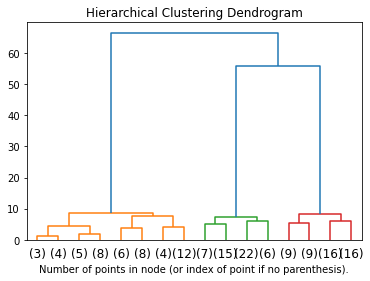

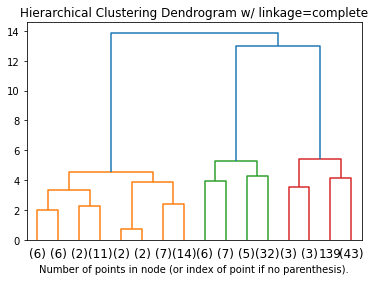

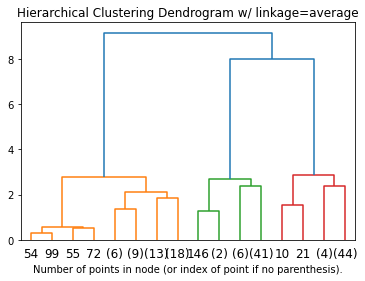

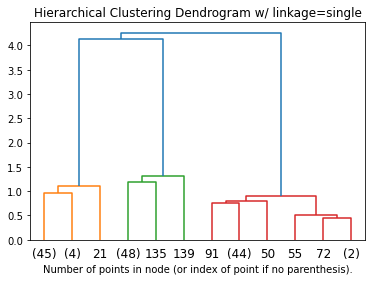

In [6]:
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

# creates linkage matrix and plots dendrogram
def plot_dendrogram(model, **kwargs):

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    dendrogram(linkage_matrix, **kwargs) # plot corresponding dendrogram

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(X)

model2 = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='complete')
model2 = model2.fit(X)

model3 = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='average')
model3 = model3.fit(X)

model4 = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='single')
model4 = model4.fit(X)

plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

plt.title('Hierarchical Clustering Dendrogram w/ linkage=complete')
# plot the top three levels of the dendrogram
plot_dendrogram(model2, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

plt.title('Hierarchical Clustering Dendrogram w/ linkage=average')
# plot the top three levels of the dendrogram
plot_dendrogram(model3, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

plt.title('Hierarchical Clustering Dendrogram w/ linkage=single')
# plot the top three levels of the dendrogram
plot_dendrogram(model4, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

To cluster the points, I used the scikit learn website to look at how to use sklearn.cluster.AgglomerativeClustering and read through its parameters. Next, I used its user guide to find a dendrogram example that helped me to plot the dendrograms. As the results show, you end up with very different dendrograms depending on the linkage.

## **P4-2. Clustering Structured Dataset**

**(a) Generate a swiss roll dataset**

In [12]:
from sklearn.datasets import make_swiss_roll

# generate data (swiss roll dataset)
n_samples = 1500
noise = 0.05
X, _ = make_swiss_roll(n_samples, noise=noise)
# make it thinner
X[:, 1] *= .5

I just copied and ran the given code for part (a).

**(b) Use sklearn.cluster.AgglomerativeClustering to cluster the points generated in (a), where you set the parameters as n_clusters=6, connectivity=connectivity, linkage='ward'.**

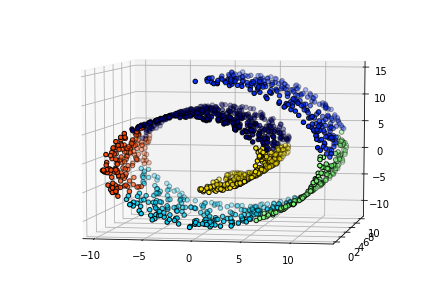

In [13]:
from sklearn.neighbors import kneighbors_graph
import mpl_toolkits.mplot3d.axes3d as p3

connectivity = kneighbors_graph(X, n_neighbors=10, include_self=False)
model = AgglomerativeClustering(n_clusters=6, connectivity=connectivity, linkage='ward').fit(X)
label = model.labels_

fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(7, -80)
for l in np.unique(label):
    ax.scatter(X[label == l, 0], X[label == l, 1], X[label == l, 2],
               color=plt.cm.jet(float(l) / np.max(label + 1)),
               s=20, edgecolor='k')
plt.show()

Like in part 1, I consulted the sklearn.AgglomerativeClustering User guide to figure out how to create a 3d figure of the clusters.

**(c) Use sklearn.cluster.DBSCAN to cluster the points generated in (a). Plot the clustered data in a 3D figure and use different colors for each different cluster in your figure. Discuss and compare the results of DBSCAN with the results in (b).**

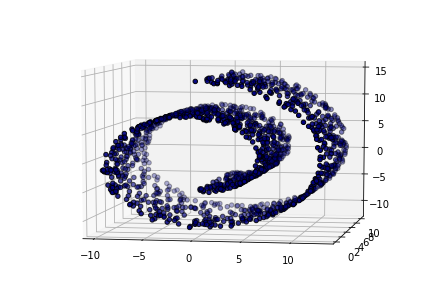

In [15]:
from sklearn.cluster import DBSCAN
import mpl_toolkits.mplot3d.axes3d as p3

model = DBSCAN(eps=3, min_samples=2).fit(X)
label = model.labels_

fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(7, -80)
for l in np.unique(label):
    ax.scatter(X[label == l, 0], X[label == l, 1], X[label == l, 2],
               color=plt.cm.jet(float(l) / np.max(label + 1)),
               s=20, edgecolor='k')
plt.show()

I consulted the sklearn.cluster.DBSCAN User guide to create the clusters. Then, I graphed the clusters in a 3d model just like in part (b).

## **P4-3. Clustering the Handwritten Digits Data**

**(a) Use K-means and DBSCAN methods to cluster the data.**

In [50]:
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

X_digits, y_digits = load_digits(return_X_y=True)
data = scale(X_digits)

n_samples, n_features = data.shape
n_digits = len(np.unique(y_digits))
labels = y_digits

pca = PCA(n_components=n_digits).fit(data)
k_means3 = KMeans(init=pca.components_, n_clusters=n_digits, n_init=1).fit(data)

dbscan = DBSCAN(eps=3, min_samples=2).fit(data)

The code to get the hand-written digits dataset was given but I adapted a bit so as to find the labels easier. I used PCA to initialize the k_means classifier and used the same parameters for dbscan as in part 2.

**(b) Evaluate these methods based on the labels of the data and discuss which method gives you the best results in terms of accuracy.**

In [53]:
from time import time
from sklearn import metrics

print("n_digits: %d,  n_samples: %d,  n_features: %d"
      % (n_digits, n_samples, n_features))

print(48 * '_')
print('init\t\taccuracy score')

def bench_k_means(estimator, name, data):
    print('%-10s\t%.3f'
          % (name,
             metrics.accuracy_score(labels, estimator.labels_)))

bench_k_means(k_means3, name="k-means", data=data)
bench_k_means(dbscan, name="DBSCAN", data=data)
print(48 * '_')

n_digits: 10,  n_samples: 1797,  n_features: 64
________________________________________________
init		accuracy score
k-means   	0.106
DBSCAN    	0.041
________________________________________________


In the output you can see the accuracy of both the k-means and dbscan clusters. The k-means turned out better than the dbscan. I'd say this is because dbscan makes clusters out of density which means (as you can see in part 2) it classifies everything as the same label.